## Introduction
Education is essential part part of human life as it encourages growth, empowerment, and social progress. However, many people still lack access to adequate education. I believe our world would be a more peaceful, equitable, and balanced place with more widespread education. In order to better understand what literacy looks like around the world and to highlight where support and awareness might be needed across different demographics, I will be analyzing a dataset from UNICEF detailing numeracy and literacy rates by country.

## Key Questions:
### 1. How do literacy rates compare across development regions?
 When considering how "developed" a country is, access to education is an important factor. Does development make a noticible difference in foundational skill proficiency? 
### 2. What does the gap between girls' and boys' literacy rates look like?
Assuming that there is a notable difference between girls' and boys' literacy rates, I want to see how it changes between countries. Do girls and boys have differing proficiency in different subjects?
### 3. How does foundational skill proficiency change across wealth quintiles?
I want to find out if there are notable differences in perfomance for children in different wealth quintiles. I also will explore how proficiency for each wealth quintile compare across development regions. Does higher wealth close gaps created by development?

Dataset: https://data.unicef.org/resources/dataset/education-data/ (Foundational learning skills)

### Data Cleaning

In [74]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('foundationalskills.xlsx')

In [2]:
df.head()

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex,Unnamed: 8,Residence,Unnamed: 10,Wealth quintile,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Data,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Girls,Boys,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,Source,Year
1,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.17807,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,MICS6,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.40823,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,MICS6,2019
3,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.80526,35.36021,43.906765,50.639637,54.517452,63.611889,MICS6,2019
4,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,MICS6,2019


In [3]:
#let's fix the names of the columns
df.rename(columns={'Sex':'Girls','Unnamed: 8':'Boys','Residence':'Rural','Unnamed: 10':'Urban',
                   'Wealth quintile':'Poorest','Unnamed: 12':'Second','Unnamed: 13':'Middle','Unnamed: 14':'Fourth','Unnamed: 15':'Richest',
                   'Data':'Source','Unnamed: 17':'Year'},inplace=True)
df

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Girls,Boys,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,Source,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Girls,Boys,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,Source,Year
1,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.17807,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,MICS6,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.40823,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,MICS6,2019
3,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.80526,35.36021,43.906765,50.639637,54.517452,63.611889,MICS6,2019
4,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,MICS6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Numeracy,5.108691,4.419424,5.773163,2.455187,13.224252,0.395979,2.538109,2.018403,8.800878,17.066843,MICS6,2019
137,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,44.365719,48.36866,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069,MICS6,2019
138,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925,MICS6,2019
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#The first and last rows contain titles and clarifying information so we can drop them
df.drop([0,140],inplace=True)
df.head()

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Girls,Boys,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,Source,Year
1,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.17807,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,MICS6,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.40823,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,MICS6,2019
3,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.80526,35.36021,43.906765,50.639637,54.517452,63.611889,MICS6,2019
4,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,MICS6,2019
5,Belarus,ECA,EECA,More Developed,Grade 2/3,Reading,80.531052,84.491585,77.278107,77.360542,81.405586,83.572975,69.217453,87.29026,81.965469,78.641289,MICS6,2019


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 1 to 139
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Countries and areas  138 non-null    object 
 1   Region               138 non-null    object 
 2   Sub-region           134 non-null    object 
 3   Development regions  134 non-null    object 
 4   Age group            138 non-null    object 
 5   Subject              138 non-null    object 
 6   Total                138 non-null    float64
 7   Girls                138 non-null    object 
 8   Boys                 138 non-null    object 
 9   Rural                138 non-null    object 
 10  Urban                138 non-null    object 
 11  Poorest              138 non-null    object 
 12  Second               138 non-null    object 
 13  Middle               138 non-null    object 
 14  Fourth               138 non-null    object 
 15  Richest              138 non-null    obj

In [6]:
#changing numerical values to correct data type
df = df.convert_dtypes()

In [7]:
#let's delete any rows with null values, then reset the index
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [8]:
#delete columns I will not use
df.drop(['Sub-region','Source','Year'],axis=1,inplace=True)
df.columns

Index(['Countries and areas', 'Region', 'Development regions', 'Age group',
       'Subject', 'Total', 'Girls', 'Boys', 'Rural', 'Urban', 'Poorest',
       'Second', 'Middle', 'Fourth', 'Richest'],
      dtype='object')

In [9]:
#seeing how the values in this column are distributed
df['Development regions'].value_counts()

Development regions
Least Developed    64
Less Developed     60
More Developed      8
Not Classified      2
Name: count, dtype: Int64

In [10]:
#the data for more developed and not classified countries is very limited, so I will take this into account in my analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Countries and areas  134 non-null    string 
 1   Region               134 non-null    string 
 2   Development regions  134 non-null    string 
 3   Age group            134 non-null    string 
 4   Subject              134 non-null    string 
 5   Total                134 non-null    Float64
 6   Girls                134 non-null    Float64
 7   Boys                 134 non-null    Float64
 8   Rural                134 non-null    Float64
 9   Urban                134 non-null    Float64
 10  Poorest              134 non-null    Float64
 11  Second               134 non-null    Float64
 12  Middle               134 non-null    Float64
 13  Fourth               134 non-null    Float64
 14  Richest              134 non-null    Float64
dtypes: Float64(10), string(5)
memory usage: 

 The data has been cleaned, so we can begin to make insights

### 1. How does proficiency in foundational skills compare across development regions?

In [12]:
#for this analysis, I would like to look at numeracy and reading proficiency separately

reading=df[df['Subject']=='Reading']
reading.reset_index(drop=True,inplace=True)
numeracy=df[df['Subject']=='Numeracy']
numeracy.reset_index(drop=True,inplace=True)

In [13]:
#firstly, I want an overhead view, comparing numeracy and reading proficiency for each developmental region using a bar grap

In [14]:
#calcaluate the mean for each development region (looking only at older kids who have had more time to acquire foundational skills
y1 = reading['Total'][reading['Age group']=='Age 7 to 14'].groupby(reading['Development regions']).mean()
y2 = numeracy['Total'][reading['Age group']=='Age 7 to 14'].groupby(numeracy['Development regions']).mean()

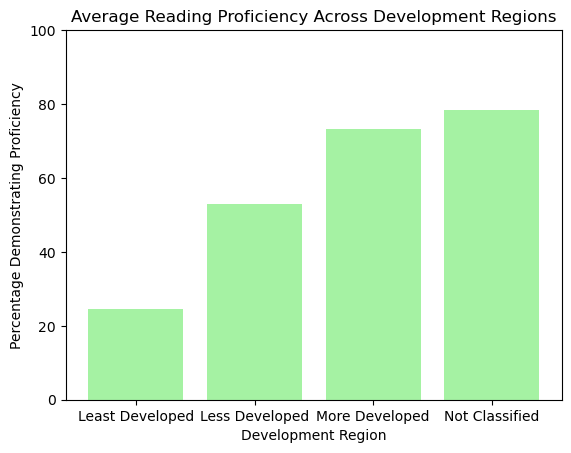

In [15]:
#visualizing average reading proficiency
plt.bar(y1.index,y1.values,color='#a5f2a3')

plt.ylim(0,100)

plt.title('Average Reading Proficiency Across Development Regions')
plt.xlabel('Development Region')
plt.ylabel('Percentage Demonstrating Proficiency')

plt.show()

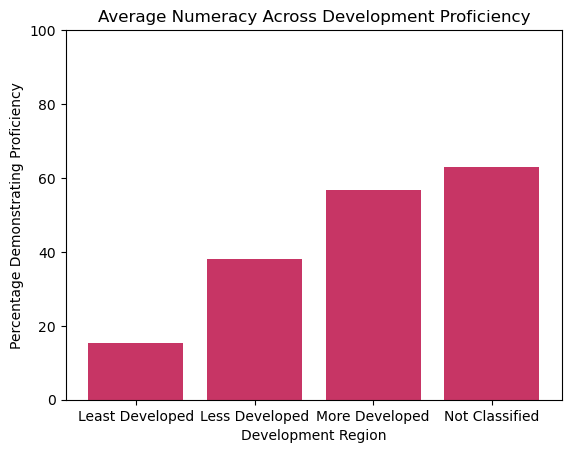

In [16]:
#visualizing average numeracy 
plt.bar(y2.index, y2.values,color='#c73565')

plt.ylim(0,100)

plt.title('Average Numeracy Across Development Proficiency')
plt.xlabel('Development Region')
plt.ylabel('Percentage Demonstrating Proficiency')

plt.show()

### Observations:
- For both numeracy and reading, more developed countries have higher proficiency then less developed regions, which have higher proficiency then least developed regions
- For both numeracy and reading, less developed countries have about double the percentage of proficiency of least developed countries
- All development regions have better average reading proficiency then numeracy

In [17]:
#additionally, I want to see how much representation there is of each development region
#amongst countries with at least 50% proficiency in each subject

In [35]:
#checking how many countries are in each development region (filtered by age group because countries are listed twice for each age group)
ref = reading['Development regions'][reading['Age group']=='Age 7 to 14'].value_counts()
ref

Development regions
Least Developed    16
Less Developed     15
More Developed      2
Not Classified      1
Name: count, dtype: Int64

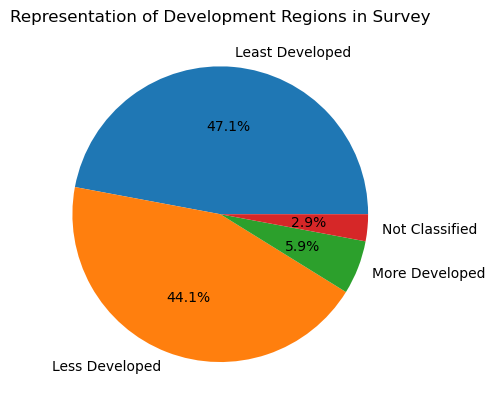

In [134]:
#visualiztion of how many countries of each development region are included in the survey for reference
plt.pie(ref, labels=ref.index, autopct='%1.1f%%')

plt.title('Representation of Development Regions in Survey')
plt.show()

In [21]:
#find which countries have proficiency at least 50%
r = reading[(reading['Age group']=='Age 7 to 14') & (reading['Total']>=50)].sort_values(by='Development regions')
r_regions=r['Development regions'].value_counts()

n = numeracy[(numeracy['Age group']=='Age 7 to 14') & (numeracy['Total']>=50)].sort_values(by='Development regions')
n_regions=n['Development regions'].value_counts()

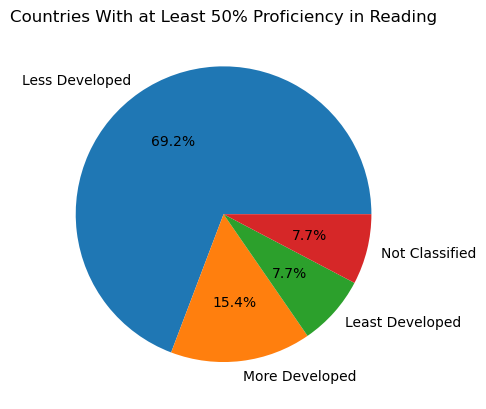

In [22]:
#visualization of the development regions of each country with at least 50% reading proficiency
plt.pie(r_regions,labels=r_regions.index, autopct='%1.1f%%')

plt.title('Countries With at Least 50% Proficiency in Reading')
plt.show()

In [23]:
r['Development regions'].value_counts()

Development regions
Less Developed     9
More Developed     2
Least Developed    1
Not Classified     1
Name: count, dtype: Int64

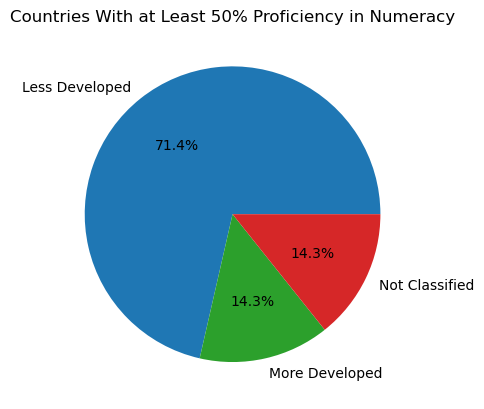

In [24]:
#visualization of the development regions of each country with at least 50% numeracy proficiency
plt.pie(n_regions,labels=n_regions.index, autopct='%1.1f%%',colors=['tab:blue','tab:green','tab:red'])

plt.title('Countries With at Least 50% Proficiency in Numeracy')
plt.show()

In [25]:
n['Development regions'].value_counts()

Development regions
Less Developed    5
More Developed    1
Not Classified    1
Name: count, dtype: Int64

### Observations:
 - Though there is about the same number of less developed and least developed countries surveyed, less developed countries make up a significant portion of countries with at least 50% proficiency in both reading and numeracy (66.7% and 71.4%, respectively)
- None of the least developed countries in the survey had at least 50% proficiency in numeracy


### 2. What does the gap between girls' and boys' literacy look like?

In [ ]:
#to visualize this, I will create a grouped bar chart by sex

In [77]:
#list of countries and boys' and girls' reading proficiecny
n_countries=np.arange(len(reading['Countries and areas'][reading['Age group']=='Age 7 to 14']))
f_read=reading['Girls'][reading['Age group']=='Age 7 to 14']
m_read=reading['Boys'][reading['Age group']=='Age 7 to 14']

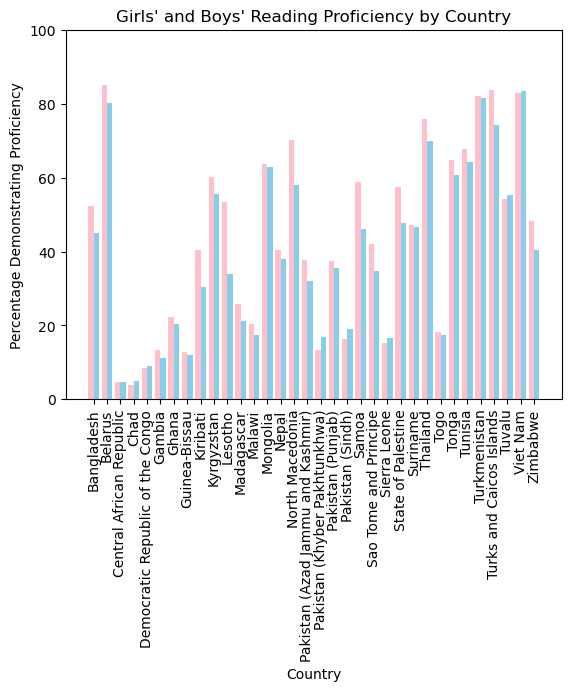

In [133]:
#visualization of girls' and boys' reading proficiency by country
width = 0.4

plt.ylim(0,100)
plt.bar(n_countries-width/2,f_read,width,color='pink')
plt.bar(n_countries+width/2,m_read,width,color='skyblue')
plt.xticks(n_countries,reading['Countries and areas'][reading['Age group']=='Age 7 to 14'],rotation=90)
plt.title("Girls' and Boys' Reading Proficiency by Country")
plt.ylabel("Percentage Demonstrating Proficiency")
plt.xlabel('Country')

plt.show()

In [79]:
f_num=numeracy['Girls'][numeracy['Age group']=='Age 7 to 14']
m_num=numeracy['Boys'][numeracy['Age group']=='Age 7 to 14']

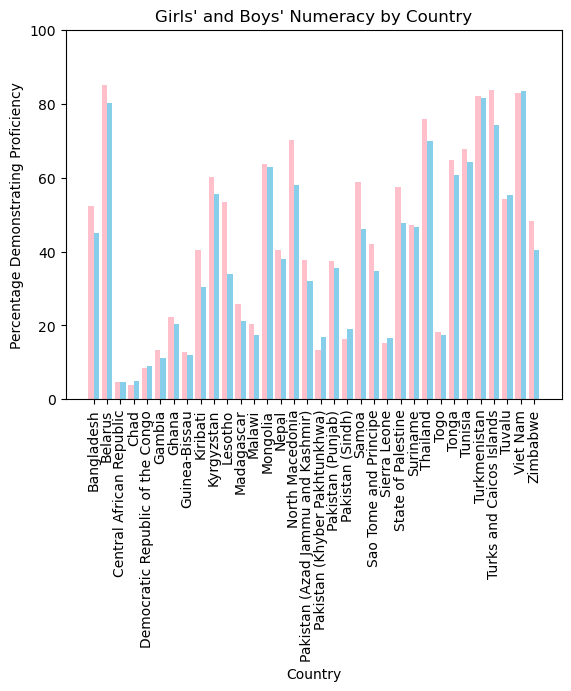

In [131]:
#visualization of girls' and boys' numeracy by country
width = 0.4
plt.bar(n_countries-width/2,f_read,width,color='pink')
plt.bar(n_countries+width/2,m_read,width,color='skyblue')

plt.ylim(0,100)
plt.xticks(n_countries,numeracy['Countries and areas'][numeracy['Age group']=='Age 7 to 14'],rotation=90)
plt.title("Girls' and Boys' Numeracy by Country")
plt.ylabel("Percentage Demonstrating Proficiency")
plt.xlabel('Country')

plt.show()

### Observations:
- Most countries have a differnence in proficiency that is only a few percentage points
 - Samoa, North Macedonia, and Lesotho had the largest gender gaps with girls having much higher proficiency in both subjects
 - All countries where boys had higher proficiency for than girls (except for Vietnam and Tuvalu) had below 20% proficiency overall for both subjects

### 3. How does proficiency in foundational skills change across wealth quintiles?

In [ ]:
#to analyze this, I will create a line graph with a line for each development region

In [128]:
#find mean reading proficiency for each wealth quintile
wealth=['Poorest','Second','Middle','Fourth','Richest']
wq1=reading['Poorest'][(reading['Age group']=='Age 7 to 14')].groupby(reading['Development regions']).mean()
wq2=reading['Second'][(reading['Age group']=='Age 7 to 14')].groupby(reading['Development regions']).mean()
wq3=reading['Middle'][(reading['Age group']=='Age 7 to 14')].groupby(reading['Development regions']).mean()
wq4=reading['Fourth'][(reading['Age group']=='Age 7 to 14')].groupby(reading['Development regions']).mean()
wq5=reading['Richest'][(reading['Age group']=='Age 7 to 14')].groupby(reading['Development regions']).mean()

In [111]:
#create an array of the y values for each development region
least_r=np.array([wq1['Least Developed'],wq2['Least Developed'],wq3['Least Developed'],wq4['Least Developed'],wq5['Least Developed']])
less_r=np.array([wq1['Less Developed'],wq2['Less Developed'],wq3['Less Developed'],wq4['Less Developed'],wq5['Less Developed']])
more_r=np.array([wq1['More Developed'],wq2['More Developed'],wq3['More Developed'],wq4['More Developed'],wq5['More Developed']])

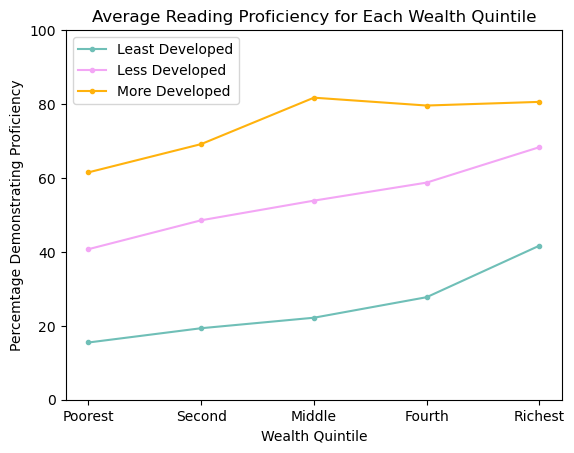

In [126]:
#visualization
plt.plot(wealth,least_r,marker='.',color='#6fbfb7')
plt.plot(wealth,less_r,marker='.',color='#f3a6f5')
plt.plot(wealth,more_r,marker='.',color='#ffb20d')

plt.ylim(0,100)
plt.title('Average Reading Proficiency for Each Wealth Quintile')
plt.legend(['Least Developed','Less Developed','More Developed'])
plt.xlabel('Wealth Quintile')
plt.ylabel('Percemtage Demonstrating Proficiency')

plt.show()

In [129]:
#mean numeracy for each wealth quintile
n_wq1=numeracy['Poorest'][(numeracy['Age group']=='Age 7 to 14')].groupby(numeracy['Development regions']).mean()
n_wq2=numeracy['Second'][(numeracy['Age group']=='Age 7 to 14')].groupby(numeracy['Development regions']).mean()
n_wq3=numeracy['Middle'][(numeracy['Age group']=='Age 7 to 14')].groupby(numeracy['Development regions']).mean()
n_wq4=numeracy['Fourth'][(numeracy['Age group']=='Age 7 to 14')].groupby(numeracy['Development regions']).mean()
n_wq5=numeracy['Richest'][(numeracy['Age group']=='Age 7 to 14')].groupby(numeracy['Development regions']).mean()

In [130]:
##create an array of the y values for each development region
least_n=np.array([n_wq1['Least Developed'],n_wq2['Least Developed'],n_wq3['Least Developed'],n_wq4['Least Developed'],n_wq5['Least Developed']])
less_n=np.array([n_wq1['Less Developed'],n_wq2['Less Developed'],n_wq3['Less Developed'],n_wq4['Less Developed'],n_wq5['Less Developed']])
more_n=np.array([n_wq1['More Developed'],n_wq2['More Developed'],n_wq3['More Developed'],n_wq4['More Developed'],n_wq5['More Developed']])

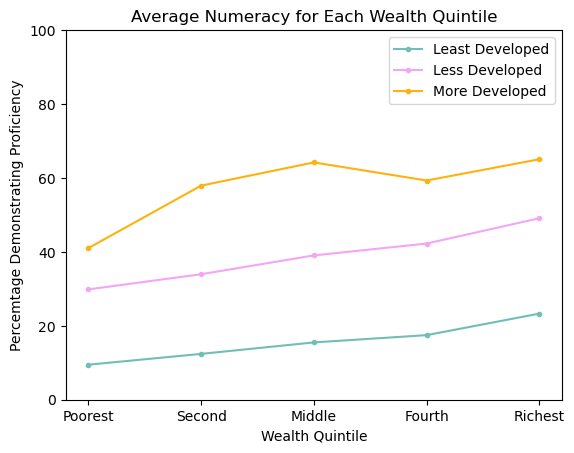

In [127]:
#visualization
plt.plot(wealth,least_n,marker='.',color='#6fbfb7')
plt.plot(wealth,less_n,marker='.',color='#f3a6f5')
plt.plot(wealth,more_n,marker='.',color='#ffb20d')

plt.ylim(0,100)
plt.title('Average Numeracy for Each Wealth Quintile')
plt.legend(['Least Developed','Less Developed','More Developed'])
plt.xlabel('Wealth Quintile')
plt.ylabel('Percemtage Demonstrating Proficiency')

plt.show()

### Observations:
- For all devlopment regions, proficiency generally increases with wealth
 - For reading, the gap between least and less developed countries remains about constant for all wealth levels, however the gap between more developed and less developed countries becomes notably smaller for kids in the richest wealth quintile of their country
 - For numeracy, kids in the richest wealth quintile of least developed countries have a lower average proficiency than kids in the poorest wealth quintile of less developed countries

### Limitations:
- There was very limited data for more developed countries, so caution must be used in making comparisons with it 
 - The survey data is from different years between 2017 and 2020, so it's impossible to account for changes from year to year when comparing countries

### Conclusion
#### In order to raise foundational skill proficiency for all children I believe:
##### - Across all development regions, students need greater support in numeracy due to consistently lower proficiency compared to reading proficiency
     -> Schools should focus more resources towards math education
 ##### -   Proficiency is consistently lower amongst lower wealth quintiles
     -> Countries should take steps to uphold quality and standards in public schools
     -> Government should make tutoring a viable option for all students by creating public tutoring and/or supplementing cost of tutoring
##### - Least developed countries have lower foundational skills proficieny
    -> Through the process of developing, international non-profits and governments should put education high on their priority list
 An educated population of children is the start of building a better future for their country and this requires deeper structural changes and more reconfiguration than any single government or organization can achieve. What makes a country considered "developed" or not is also a convoluted distinction and the reasons for extreme differences of quality of life around the world are even more complicated when considering the history and politics of development and globalization. This, however, does not mean we as individual citizens are powerless as we can contribute to minimizing inequality gaps by listening to a people of the world, paying attention to global inequalities, and supporting direct action taken through people and organizations more equipped to promote structural changes.